# Chapter2 確率分布

## 2.1 二値変数

二値変数確率変数$x \in{\{0, 1\}}$に対して$x = 1$となる確率が$\mu$で表現されるとすると
$$
Bern(x|\mu) = \mu^x(1-\mu)^{1-x}
$$
となる。これはベルヌーイ分布として知られる

この分布の平均と分散は
$$
E[x] = \mu
$$

$$
var[x] = \mu(1-\mu)
$$

となる。

In [104]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

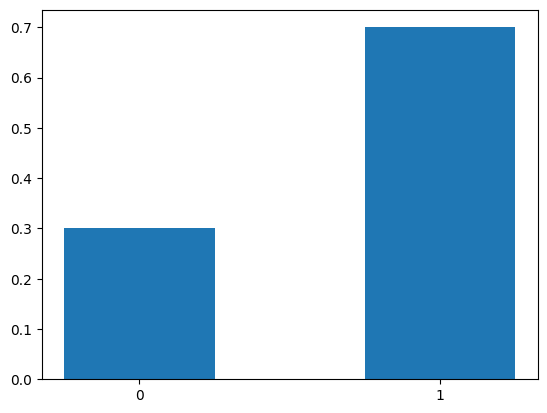

In [105]:
x = ["0", "1"]
mu = 0.7
plt.bar(x, [1-mu, mu], width=0.5,)

次に、大きさがNのあるデータ集合のうち、$x = 1$となる観測値の数mの分布を求める。

二項分布といい、以下の式で記述される。
$$
Bin(m | N, \mu) = \frac{N!}{(N-m)!m!}\mu^m(1-\mu)^{N-m}
$$
二項分布の平均と分散は
$$
E[x] = N\mu
$$

$$
var[x] = N\mu(1-\mu)
$$
となる。

In [106]:
from scipy.stats import binom
import numpy as np

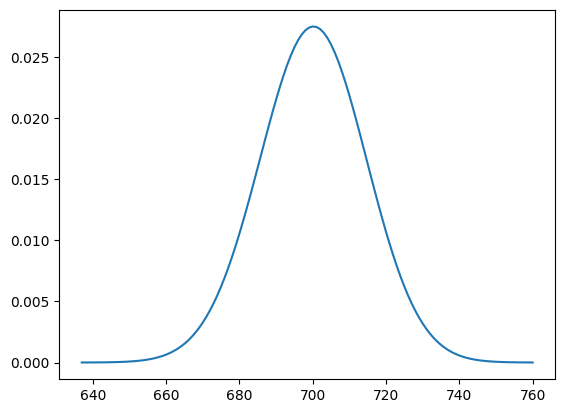

In [107]:
N = 1000
p = 0.7
x = np.arange(binom.ppf(0.00001, N, p),
              binom.ppf(0.99999, N, p))
bin_dist = binom.pmf(x, N, p)
plt.plot(x, bin_dist)

### 2.1.1 ベータ分布

ベルヌーイ分布と二項分布のパラメータ$\mu$の最尤推定である
$$
\mu_{ML} = \frac{m}{N}
$$
がデータ集合中で$x=1$となる観測値の割合となる。

しかしこれはデータ集合が小さいと過学習してしまう。（例えばコイントスを3回して、3回とも表が出るなど）

この問題をベイズ主義的に扱うためには$\mu$の事前分布$p(\mu)$を導入する必要がある。事前分布を考えるにあたり尤度関数が$\mu^x(1-\mu)^{1-x}$の形になっていることに注意すると事前分布も同じ関数形式となっていた方がそれらの積である事後分布を扱いやすい。

このような事前分布としてベータ分布が挙げられる。
$$
Beta(\mu|a, b) = \frac{\Gamma{(a+b)}}{\Gamma{(a)}\Gamma{(b)}}\mu^{a-1}(1-\mu)^{b-1}
$$

$$
\Gamma{(z)} = \int_0^\infty t^{z-1} e^{-t} \,dt
$$

二項分布に対するベータ分布の関係を共役事前分布という。事前分布がベータ分布であり、尤度関数が二項分布の場合、事後分布もベータ分布となることが知られている。

ベータ分布の平均と分散は
$$
E[\mu] = \frac{a}{a+b}
$$

$$
var[\mu] = \frac{ab}{(a+b)^2(a+b+1)}
$$
で与えられる。

In [108]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [109]:
def plot_beta_distribution(a=2, b=3):
    x = np.linspace(0, 1, 1000)
    y = beta.pdf(x, a, b)

    plt.figure(figsize=(5, 3))
    plt.plot(x, y, label=f"a={round(a,1)}\nb={round(b,1)}")
    plt.title("Plot of the Beta Distribution")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# ウィジェットの定義
a_slider = widgets.FloatSlider(value=2, min=1, max=10, step=1, description="a:")
b_slider = widgets.FloatSlider(value=3, min=1, max=10, step=1, description="b:")

# インタラクティブプロットの作成
interactive_plot = widgets.interactive(plot_beta_distribution, a=a_slider, b=b_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=2.0, description='a:', max=10.0, min=1.0, step=1.0), FloatSlider(value…

$\mu$の事後分布はベータ事前分布に二項尤度関数をかけたものに相当する。$\mu$に依存する部分だけ取り出すと

$$
p(\mu|m, N-m, a, b) \propto \mu^{m+a-1}(1-\mu)^{N-m+b-1}
$$

これもベータ分布として表すことができ、

$$
p(\mu|m,N-m,a,b) = \frac{\Gamma{(a+b+N)}}{\Gamma{(m+a)}\Gamma{(N-m+b)}}\mu^{m+a-1}(1-\mu)^{N-m+b-1}
$$
になる。

この式から$x=1$となる観測値をm個、$x=0$となる観測値をN-m個含むデータ集合を考えると、事前分布から、この集合を観測した後の事後分布を求めるには、aをmだけ、bをN-mだけ増やせばよいことがわかる。


## 2.2 多値変数

K個の可能な状態のうち1つを取るような離散変数を扱う。
変数は1つの要素が1でそれ以外が0のようなK次元ベクトル$\mathbf{x}$で表される。

$x_k=1$となる確率をパラメータ$\mu_k$で表すと$\mathbf{x}$の分布は
$$
p(\mathbf{x}|\boldsymbol{\mu}) = \prod_{k=1}^{K}{\mu_k^{x_k}}
$$

で表される。
平均は
$$
E[\mathbf{x}|\boldsymbol{\mu}] = \boldsymbol{\mu}
$$
となる。

ここでN個の独立な観測値$\mathbf{x_1}, \mathbf{x_2}, ..., \mathbf{x_N}$のデータ集合Dについて考えるとこのときの尤度関数は
$$
p(D|\boldsymbol{\mu}) = \prod_{n=1}^{N}\prod_{k=1}^{K}{\mu_k^{x_{nk}}} = \prod_{k=1}^{K}{\mu_k^{m_k}}
$$

$$
m_k = \sum_{n}{x_{nk}}
$$

$\boldsymbol{\mu}$の最尤推定解は
$$
\mu_{k}^{ML} = \frac{m_k}{N}
$$

パラメータ$\boldsymbol{\mu}$と観測値の総数Nが与えられた条件の下で、$m_1,...,m_K$の同時確率を考えると

$$
Mult(m_1, m_2, ..., m_k|\boldsymbol{\mu}, N) = \frac{N!}{m_1!...m_k!}\prod_{k=1}^{K}{\mu_k^{m_k}}
$$

$$
\sum_{k=1}^{K}{m_k} = N
$$

となり、多項分布として知られる。

In [110]:
# 利用するライブラリ
import numpy as np
from scipy.stats import multinomial # 多項分布
from scipy.special import gamma, loggamma # ガンマ関数, 対数ガンマ関数
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [111]:
# 確率の計算
mu_v = np.array([0.3, 0.5, 0.2])

# 確率変数の値を指定
m_v = np.array([2.0, 3.0, 1.0])

# データ数を計算
N = np.sum(m_v)

In [112]:
# 定義式により確率を計算
C = gamma(N + 1.0) / np.prod(gamma(m_v + 1.0))
prob = C * np.prod(mu_v**m_v)
print(prob)

0.13499999999999998


In [113]:
# 対数をとった定義式により確率を計算
log_C = loggamma(N + 1.0) - np.sum(loggamma(m_v + 1.0))
log_prob = log_C + np.sum(m_v * np.log(mu_v))
prob = np.exp(log_prob)
print(prob, log_prob)

0.13500000000000006 -2.002480500543707


In [114]:
# 多項分布の関数により確率を計算
prob = multinomial.pmf(x=m_v, n=N, p=mu_v)
print(prob)

0.13500000000000018


In [115]:
# 多項分布の対数をとった関数により確率を計算
log_prob = multinomial.logpmf(x=m_v, n=N, p=mu_v)
prob = np.exp(log_prob)
print(prob, log_prob)

0.13500000000000018 -2.0024805005437063


In [116]:
# 試行回数を指定
M = 10

# 作図用のxの値を作成
x_vals = np.arange(M + 1)

# 格子点を作成
X1, X2 = np.meshgrid(x_vals, x_vals)

# 作図用のxの点を作成
x1_vals = X1.flatten()
x2_vals = X2.flatten()
x3_vals = np.where(x1_vals+x2_vals <= M, M - (x1_vals+x2_vals), 0.0)

# 計算用のxの点を作成
x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)
print(x_points[:5])
print(x_points.shape)

[[ 0.  0. 10.]
 [ 1.  0.  9.]
 [ 2.  0.  8.]
 [ 3.  0.  7.]
 [ 4.  0.  6.]]
(121, 3)


In [117]:
# 分布を計算
probability = multinomial.pmf(x=x_points, n=M, p=mu_v)
print(probability[:5])
print(np.sum(probability))

[1.02400e-07 1.53600e-06 1.03680e-05 4.14720e-05 1.08864e-04]
1.0000000000000004


In [118]:
# xがとり得ない値の要素を削除
x1_del_vals = np.delete(arr=x1_vals, obj=x1_vals+x2_vals > M)
x2_del_vals = np.delete(arr=x2_vals, obj=x1_vals+x2_vals > M)
probability_del = np.delete(arr=probability, obj=x1_vals+x2_vals > M)
print(x1_del_vals[45:55])
print(x2_del_vals[45:55])
print(probability_del[45:55])

[0 1 2 3 4 5 0 1 2 3]
[5 5 5 5 5 5 6 6 6 6]
[0.00252    0.0189     0.0567     0.08505    0.0637875  0.01913625
 0.00525    0.0315     0.070875   0.070875  ]


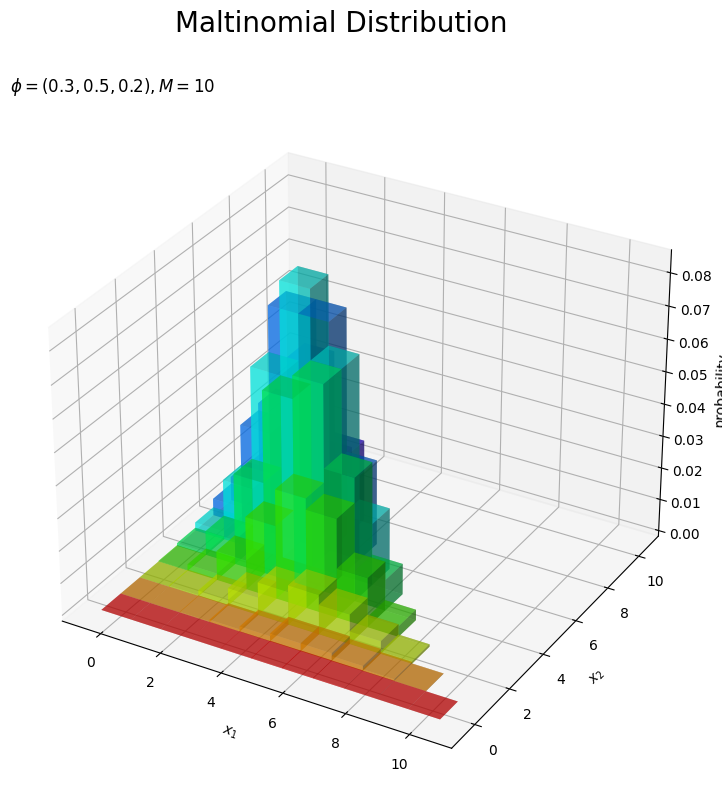

In [119]:
# カラーマップを設定
cm = plt.get_cmap('hsv')

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(x2_del_vals / M), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(mu) for mu in mu_v]) + '), M=' + str(M) + '$', loc='left')
#ax.view_init(elev=90, azim=270) # 表示アングル
plt.show()

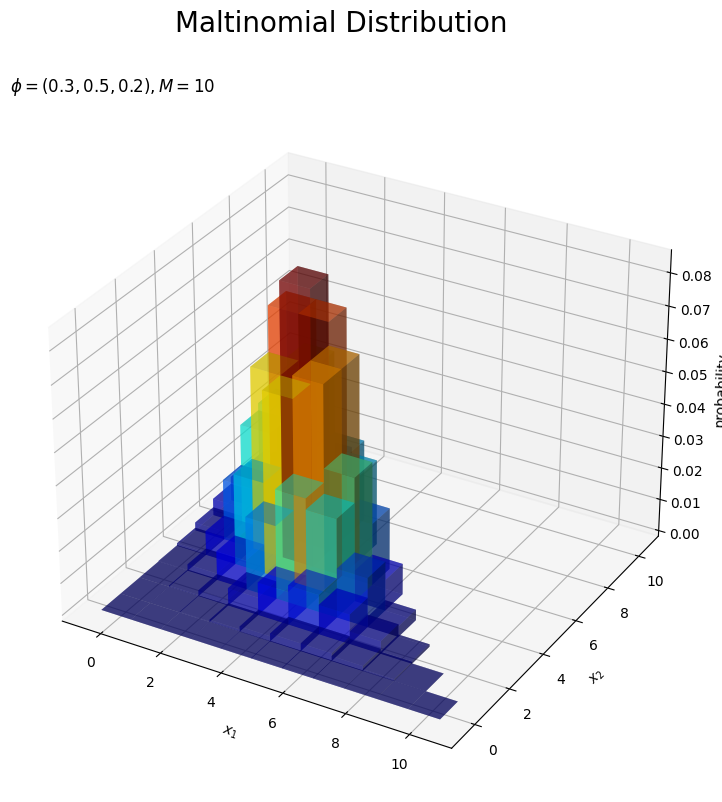

In [120]:
# カラーマップを設定
cm = plt.get_cmap('jet')

# 多項分布を作図
fig = plt.figure(figsize=(12, 9)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.bar3d(x=x1_del_vals - 0.5, y=x2_del_vals - 0.5, z=np.zeros_like(x1_del_vals), 
         dx=1.0, dy=1.0, dz=probability_del, 
         color=cm(probability_del / np.max(probability_del)), alpha=0.5, shade=True) # 3D棒グラフ
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('probability')
fig.suptitle('Maltinomial Distribution', fontsize=20)
ax.set_title('$\phi=(' + ', '.join([str(mu) for mu in mu_v]) + '), M=' + str(M) + '$', loc='left')
#ax.view_init(elev=0, azim=300) # 表示アングル:(横から)
#ax.view_init(elev=90, azim=270) # 表示アングル:(上から)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


[[0.    0.6   0.4  ]
 [0.01  0.594 0.396]
 [0.02  0.588 0.392]
 [0.03  0.582 0.388]
 [0.04  0.576 0.384]]
[1. 1. 1. 1. 1.]
(101, 3)
[[ 0.  0. 10.]
 [ 1.  0.  9.]
 [ 2.  0.  8.]
 [ 3.  0.  7.]
 [ 4.  0.  6.]]
(66, 3)


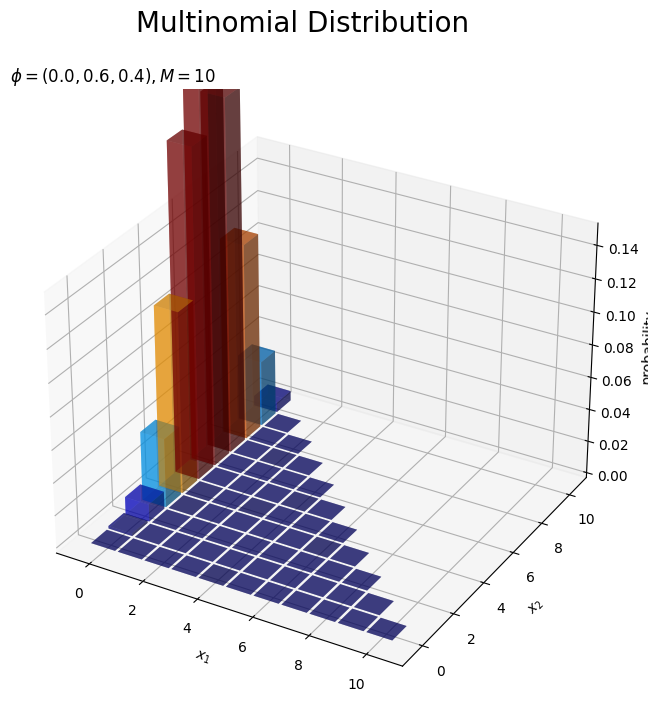

In [121]:
# 作図用のphiの値を作成
phi_vals = np.arange(start=0.0, stop=1.01, step=0.01)

# 作図用のphiの点を作成
phi_points = np.stack([
    phi_vals, 
    (1.0 - phi_vals) * 0.6, # 配分を指定
    (1.0 - phi_vals) * 0.4 # 配分を指定
], axis=1)
print(phi_points[:5])
print(np.sum(phi_points[:5], axis=1))
print(phi_points.shape)

# 試行回数を指定
M = 10

# 作図用のxの値を作成
x_vals = np.arange(M + 1)

# 格子点を作成
X1, X2 = np.meshgrid(x_vals, x_vals)

# 作図用のxの点を作成:(xがとり得ない値を消去する場合)
x1_vals = np.delete(X1.flatten(), obj=(X1 + X2).flatten() > M)
x2_vals = np.delete(X2.flatten(), obj=(X1 + X2).flatten() > M)

# 作図用のxの点を作成:(全ての組み合わせを描画する場合)
#x1_vals = X1.flatten()
#x2_vals = X2.flatten()
x3_vals = np.where(x1_vals+x2_vals <= M, M - (x1_vals+x2_vals), 0.0)

# 計算用のxの点を作成
x_points = np.stack([x1_vals, x2_vals, x3_vals], axis=1)
print(x_points[:5])
print(x_points.shape)

# カラーマップの設定
cm = plt.get_cmap('jet')

# カラーマップの最大値を指定
p_max = 0.15

# 図を初期化
fig = plt.figure(figsize=(12, 8)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle('Multinomial Distribution', fontsize=20)

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    phi_v = phi_points[i]
    
    # i番目のパラメータによる分布を計算
    probability = multinomial.pmf(x=x_points, n=M, p=phi_v)
    
    # xがとり得ない値の要素をマスク:(xがとり得ない値をマスクする場合)
    #probability = np.ma.masked_where(x1_vals + x2_vals > M, probability)
    
    # 多項分布を作図
    ax.bar3d(x=x1_vals - 0.45, y=x2_vals - 0.45, z=np.zeros_like(x1_vals), 
             dx=0.9, dy=0.9, dz=probability, 
             color=cm(probability / p_max), alpha=0.5, shade=True) # 3D棒グラフ
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('probability')
    ax.set_title('$\phi=(' + ', '.join([str(phi) for phi in np.round(phi_v, 2)]) + ')' +
                 ', M=' + str(M) + '$', loc='left')
    ax.set_zlim(0.0, p_max) # z軸の表示範囲
    #ax.view_init(elev=0, azim=315) # 表示アングル

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=len(phi_vals), interval=50)

# gif画像を保存
anime_prob.save('Multinomial_prob_phi.gif')

### 2.2.1 ディリクレ分布

多項分布のパラメータ$\mu_k$に対する事前分布の候補としてディリクレ分布を導入する。
$$
Dir(\boldsymbol{\mu}|\boldsymbol{\alpha}) = \frac{\Gamma{(\alpha_0)}}{\Gamma{(\alpha_1)}...\Gamma{(\alpha_K)}}
\prod_{k=1}^{K}{\mu_k^{\alpha_k-1}}
$$
$$
\alpha_0 = \sum_{k=1}^{K}{\alpha_k}
$$
$\mu_k$は総和の制約から、K-1次元の単体上に制限されて分布する。

これも事前ディリクレ分布に尤度多項分布を掛けると事後分布もディリクレ分布の形で書けることが明らかである。


## 2.3 ガウス分布

一変数のガウス分布は
$$
N(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$
と書ける。

D次元ベクトル$\mathbf{x}$に対する多変量ガウス分布は
$$
N(x \mid \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}} 
\exp{\{-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^T \Sigma^{-1}  (\mathbf{x}-\boldsymbol{\mu}) \}}
$$

となる。ただし、$\boldsymbol{\mu}$はD次元の平均ベクトル、$\Sigma$はD×Dの共分散行列を表している。

ガウス分布は多くの場面で現れる。エントロピーを最大化する分布はガウス分布であることが知られている。

ガウス分布の幾何的な形状について考えることから始める。
$$
\Delta^2 = (\mathbf{x}-\boldsymbol{\mu})^T \Sigma^{-1}  (\mathbf{x}-\boldsymbol{\mu})
$$
この量$\Delta$を$\mu$から$x$までのマハラノビス距離という。
これは共分散行列が実数の対称行列であることを考慮するともとのxの座標系を平行移動し、回転した正規直交ベクトルで定義された新しいベクトルyで以下のように表現できる
$$
y = U(\mathbf{x}-\boldsymbol{\mu})
$$

$\Delta^2$が定数となる面（楕円の円上？）ではガウス分布の密度も一定となる。

共分散行列の固有値が厳密に正である行列を正定値、すべての固有値が非負である行列を半正定値という。

$y = U(\mathbf{x}-\boldsymbol{\mu})$の系でUは直交行列であるため多変量ガウス分布はD個の独立な1変数ガウス分布の積で書ける。

$$
p(\mathbf{y}) = \prod_{j=1}^{D}{\frac{1}{(2\pi\lambda_i)^{1/2}}} \exp{\left(-\frac{y_j^2}{2\lambda_j}\right)}
$$

ガウス分布の$\mathbf{x}$の期待値は
$$
E[\mathbf{x}] = \boldsymbol{\mu}
$$
また、共分散は
$$
cov[\mathbf{x}] = \Sigma
$$

ガウス同時分布

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation

In [164]:
# 関数に投入するデータを作成
x_1, x_2 = np.mgrid[-5:6:.1, -5:6:.1]
pos = np.dstack((x_1, x_2))
mean = np.array([0, 0])
cov = np.array([[10,-5],[-5,10]])


In [165]:
mn = multivariate_normal(mean=mean, cov=cov, allow_singular=True)
Z = mn.pdf(pos)

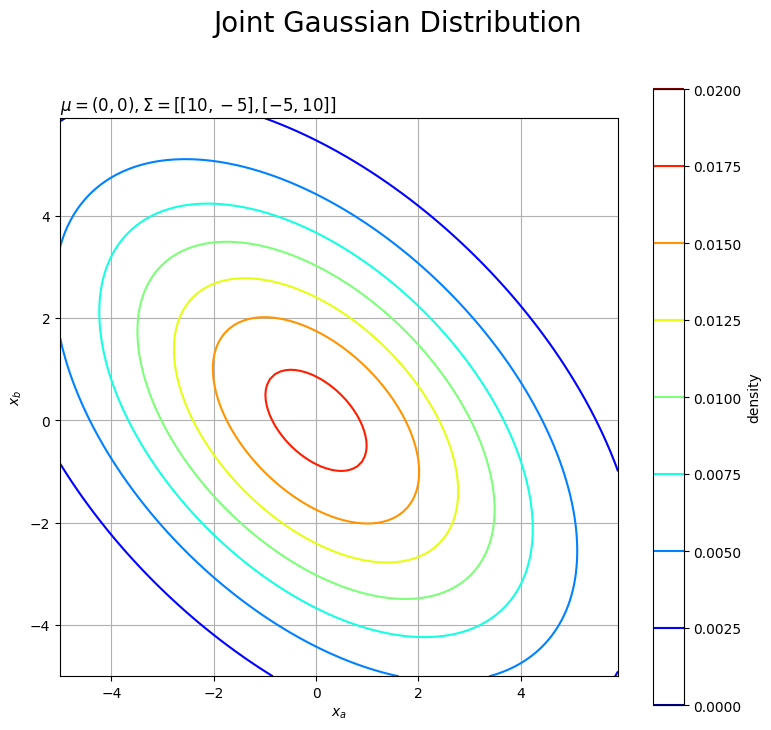

In [166]:
# 同時ガウス分布の2Dグラフを作成
plt.figure(figsize=(9, 8))
plt.contour(x_1, x_2, Z.reshape(x_1.shape), cmap='jet') # 同時分布:(等高線図)
plt.xlabel('$x_a$')
plt.ylabel('$x_b$')
plt.suptitle('Joint Gaussian Distribution', fontsize=20)
plt.title('$\mu=(' + ', '.join([str(mu) for mu in mean]) + ')' + 
          ', \Sigma=' + str([list(sgm_d) for sgm_d in np.round(cov, 1)]) + '$', loc='left')
plt.grid()
plt.colorbar(label='density')
plt.gca().set_aspect('equal')
plt.show()

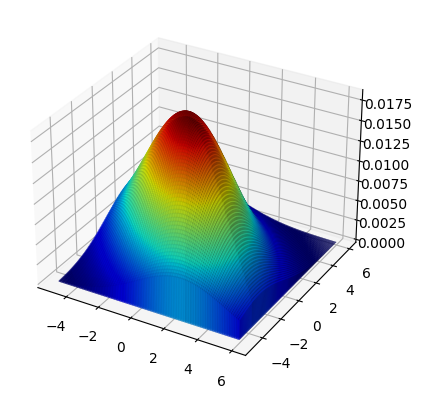

In [167]:
cm = plt.get_cmap('jet')

# 3Dプロットの準備
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# bar3dでプロット
p_max = max(Z.flatten())
dx = dy = 0.095
ax.bar3d(x=x_1.flatten(), y=x_2.flatten(), z=np.zeros_like(Z.flatten()), dx=dx, dy=dy, dz=Z.flatten(),
         color=cm(Z.flatten() / p_max), alpha=0.5)

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


(180, 2, 2)


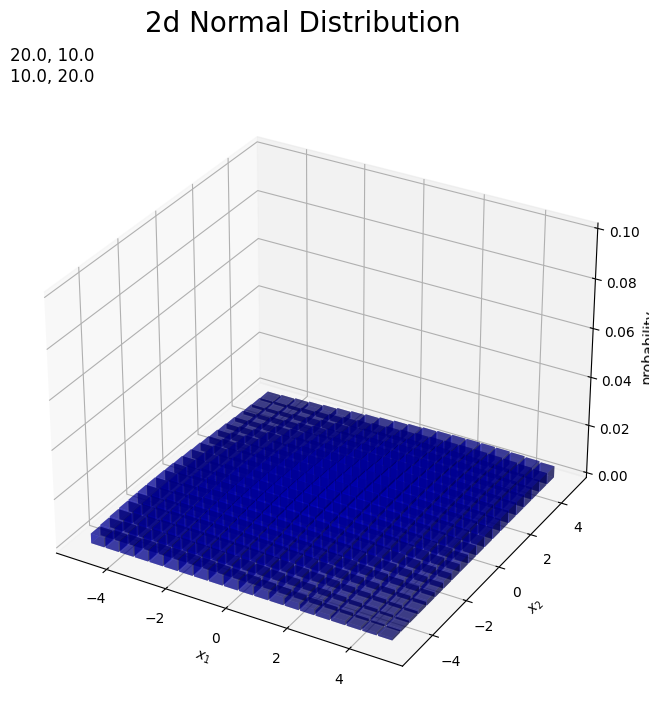

In [179]:
# 関数に投入するデータを作成
x_1, x_2 = np.mgrid[-5:5:.5, -5:5:.5]
pos = np.dstack((x_1, x_2))
mean = np.array([0, 0])

# 正定値判定関数
def is_positive_definite(matrix):
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

# 作図用のcovの値を作成
cov_vals1 = np.arange(start=200, stop=20, step=-1)


# 作図用のcovの点を作成
cov_points = np.array([np.array([[0.1*n1, 0.05*n1],[0.05*n1, 0.1*n1]]) 
                       for n1 in cov_vals1
                       if is_positive_definite(np.array([[1*n1, 0.5*n1],[0.5*n1, 1*n1]]))])

print(cov_points.shape)
# カラーマップの設定
cm = plt.get_cmap('jet')

# カラーマップの最大値を指定
p_max = 0.1

# 図を初期化
fig = plt.figure(figsize=(12, 8)) # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle('2d Normal Distribution', fontsize=20)

# 作図処理を関数として定義
def update(frame):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    cov_v = cov_points[frame]

    # i番目のパラメータによる分布を計算
    mn = multivariate_normal(mean=mean, cov=cov_v, allow_singular=True)
    Z = mn.pdf(pos)


    # 二次元ガウス分布を作図
    dx=dy=0.45
    ax.bar3d(x=x_1.flatten(), y=x_2.flatten(), z=np.zeros_like(Z.flatten()), dx=dx, dy=dy, dz=Z.flatten(),
            color=cm(Z.flatten() / p_max), alpha=0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('probability')
    ax.set_zlim(0.0, p_max) # z軸の表示範囲
    ax.set_title(f"{round(cov_v[0][0],2)}, {round(cov_v[0][1],2)}\n{round(cov_v[1][0],2)}, {round(cov_v[1][1],2)}", loc='left')
    # ax.view_init(elev=0, azim=315) # 表示アングル

anime_prob = FuncAnimation(fig, update, frames=len(cov_vals1), interval=5)

anime_prob.save('2d_normdist_prob_phi.gif')

### 2.3.1 条件付きガウス分布

条件付きガウス分布（Conditional Gaussian Distribution）は、多変量ガウス分布において、一部の変数が与えられた条件下での他の変数の分布を表す。つまり、いくつかの変数が既知の値に固定されたとき、残りの変数が従うガウス分布を記述する。

##### 数学的な定義

多変量ガウス分布の一部の変数が既知の値に固定された場合、残りの変数に対する条件付き分布は、以下のように表現される。

変数ベクトル $\mathbf{X}$ が平均 $\boldsymbol{\mu}$ と共分散行列 $\boldsymbol{\Sigma}$ の多変量ガウス分布に従うとする。このベクトルを2つの部分 $\mathbf{X}_A$ と $\mathbf{X}_B$ に分割する。

$$
\mathbf{X} = \begin{bmatrix} \mathbf{X}_A \\ \mathbf{X}_B \end{bmatrix}, \quad \boldsymbol{\mu} = \begin{bmatrix} \boldsymbol{\mu}_A \\ \boldsymbol{\mu}_B \end{bmatrix}, \quad \boldsymbol{\Sigma} = \begin{bmatrix} \boldsymbol{\Sigma}_{AA} & \boldsymbol{\Sigma}_{AB} \\ \boldsymbol{\Sigma}_{BA} & \boldsymbol{\Sigma}_{BB} \end{bmatrix}
$$

$\mathbf{X}_B$ が与えられたときの $\mathbf{X}_A$ の条件付きガウス分布は、以下の平均と共分散行列を持つ。

$$
\begin{align*}
\boldsymbol{\mu}_{A|B} &= \boldsymbol{\mu}_A + \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} (\mathbf{X}_B - \boldsymbol{\mu}_B) \\
\boldsymbol{\Sigma}_{A|B} &= \boldsymbol{\Sigma}_{AA} - \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} \boldsymbol{\Sigma}_{BA}
\end{align*}
$$

##### 解釈と応用

条件付きガウス分布は、多くの統計的および機械学習の応用に使用される。たとえば、カルマンフィルターでは、条件付きガウス分布を用いて、時系列データにおける状態の更新と予測を行う。

また、ガウス過程回帰などのベイズ的手法では、条件付きガウス分布を用いて、観測データに基づいて関数の未知の部分を推定する。

### 2.3.2 周辺ガウス分布

同時分布$p(\mathbf{X_A}, \mathbf{X_B})$がガウス分布であれば、条件付き分布$p(\mathbf{X_A}|\mathbf{X_B})$もガウス分布になることが2.3.1で分かった

このとき周辺分布$p(\mathbf{X_A})$もガウス分布となる。

$\mathbf{X}_A$ の周辺ガウス分布は、以下の平均と共分散行列を持つ。

$$
E[\mathbf{X_A}] = \boldsymbol{\mu_A}
$$

$$
cov[\mathbf{X_A}] = \Sigma_{AA}
$$

分割されたガウス分布をまとめると
変数ベクトル $\mathbf{X}$ が平均 $\boldsymbol{\mu}$ と共分散行列 $\boldsymbol{\Sigma}$ の多変量ガウス分布に従うとする。このベクトルを2つの部分 $\mathbf{X}_A$ と $\mathbf{X}_B$ に分割する。

$$
\mathbf{X} = \begin{bmatrix} \mathbf{X}_A \\ \mathbf{X}_B \end{bmatrix}, \quad 
\boldsymbol{\mu} = \begin{bmatrix} \boldsymbol{\mu}_A \\ \boldsymbol{\mu}_B \end{bmatrix}
$$

$$
\boldsymbol{\Sigma} = \begin{bmatrix} \boldsymbol{\Sigma}_{AA} & \boldsymbol{\Sigma}_{AB} \\ \boldsymbol{\Sigma}_{BA} & \boldsymbol{\Sigma}_{BB} \end{bmatrix}, \quad
\boldsymbol{\Lambda} = \begin{bmatrix} \boldsymbol{\Lambda}_{AA} & \boldsymbol{\Lambda}_{AB} \\ \boldsymbol{\Lambda}_{BA} & \boldsymbol{\Lambda}_{BB} \end{bmatrix}
$$

##### 条件付き分布
$$
p(x_A|x_B) = N(x_A|\mu_{A|B}, \Sigma_{AA})
$$


$$
\begin{align*}
\boldsymbol{\mu}_{A|B} &= \boldsymbol{\mu}_A + \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} (\mathbf{X}_B - \boldsymbol{\mu}_B) \\
\boldsymbol{\Sigma}_{A|B} &= \boldsymbol{\Sigma}_{AA} - \boldsymbol{\Sigma}_{AB} \boldsymbol{\Sigma}_{BB}^{-1} \boldsymbol{\Sigma}_{BA}
\end{align*}
$$

##### 周辺分布

$$
p(x_A) = N(x_A|\mu_{A}, \Sigma_{AA})
$$


以下に2次元ガウス分布の同時ガウス分布と条件付きガウス分布と周辺ガウス分布を実装してみる

In [ ]:
import numpy as np
from scipy.stats import norm, multivariate_normal # 1変量ガウス分布, 多変量ガウス分布
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [189]:
# インデックスの指定
A, B = 0, 1

# 二次元ガウス分布のパラメータの指定
mean_d = np.array([0, 0])
cov_d = np.array([[4, 2], [2, 4]])
cov_d_inv = np.linalg.inv(cov_d)

In [192]:
# 作図用の二つの軸を設定
x_A = np.linspace(
    mean_d[A] - 3 * np.sqrt(cov_d[A, A]),
    mean_d[A] + 3 * np.sqrt(cov_d[A, A]),
    500
)

x_B = np.linspace(
    mean_d[B] - 3 * np.sqrt(cov_d[B, B]),
    mean_d[B] + 3 * np.sqrt(cov_d[B, B]),
    500
)

X_A, X_B = np.meshgrid(x_A, x_B)
X_points = np.stack([X_A.flatten(), X_B.flatten()], axis=1)
X_dim = X_A.shape

In [194]:
joint_dens = multivariate_normal.pdf(
    x=X_points, mean=mean_d, cov=cov_d
)

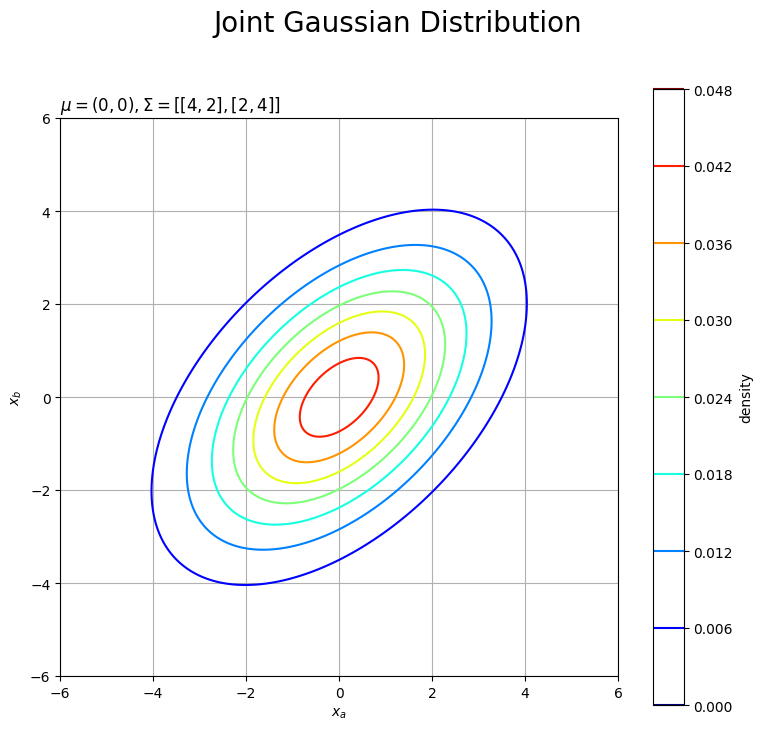

In [195]:
plt.figure(figsize=(9, 8))
plt.contour(X_A, X_B, joint_dens.reshape(X_dim), cmap='jet') # 同時分布:(等高線図)
plt.xlabel('$x_a$')
plt.ylabel('$x_b$')
plt.suptitle('Joint Gaussian Distribution', fontsize=20)
plt.title('$\mu=(' + ', '.join([str(mu) for mu in mean_d]) + ')' + 
          ', \Sigma=' + str([list(sgm_d) for sgm_d in np.round(cov_d, 1)]) + '$', loc='left')
plt.grid()
plt.colorbar(label='density')
plt.gca().set_aspect('equal')
plt.show()

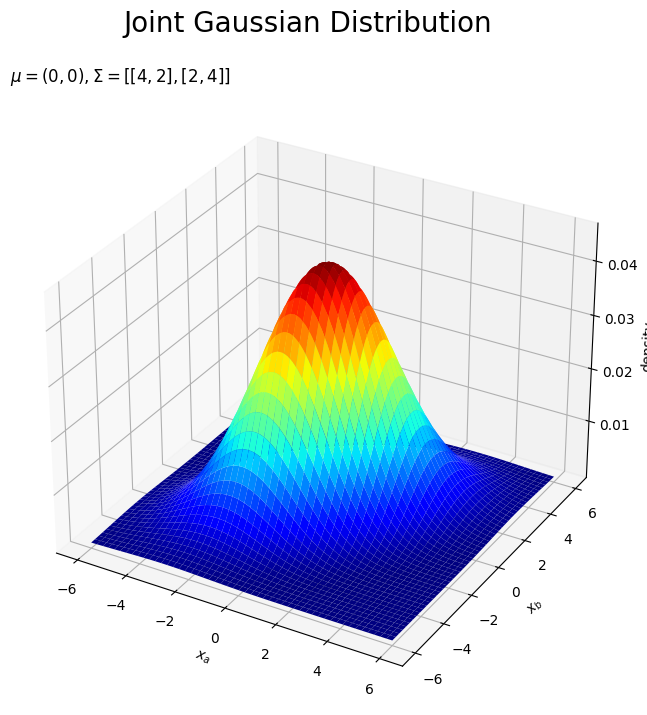

In [196]:
# 同時ガウス分布の3Dグラフを作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(X_A, X_B, joint_dens.reshape(X_dim), cmap='jet') # 同時分布:(曲面図)
#ax.contour(X_a, X_b, joint_dens.reshape(x_dims), cmap='jet', offset=0) # 同時分布:(等高線図)
ax.set_xlabel('$x_a$')
ax.set_ylabel('$x_b$')
ax.set_zlabel('density')
plt.title('$\mu=(' + ', '.join([str(mu) for mu in mean_d]) + ')' + 
          ', \Sigma=' + str([list(sgm_d) for sgm_d in np.round(cov_d, 1)]) + '$', 
          loc='left')
fig.suptitle('Joint Gaussian Distribution', fontsize=20)
#ax.view_init(elev=0, azim=300) # 表示アングル
plt.show()

In [214]:
X_d = np.array([3.0, 2.0])

# X_Aの条件付き分布のパラメータを求める
mean_A_B = mean_d[A] + cov_d[A][B] / cov_d[B][B] * (X_d[B] - mean_d[B])
cov_A_B = cov_d[A][A] - cov_d[A][B] /  cov_d[B][B] * cov_d[B][A]
print(mean_A_B, cov_A_B)

# X_Bの条件付き分布のパラメータを求める
mean_B_A = mean_d[B] + cov_d[B][A] / cov_d[A][A] * (X_d[A] - mean_d[A])
cov_B_A = cov_d[B][B] - cov_d[B][A] /  cov_d[A][A] * cov_d[A][B]
print(mean_B_A, cov_B_A)

1.0 3.0
1.5 3.0


In [215]:
conditional_dens_A = norm.pdf(x=x_A, loc=mean_A_B, scale=np.sqrt(cov_A_B))
conditional_dens_B = norm.pdf(x=x_B, loc=mean_B_A, scale=np.sqrt(cov_B_A))

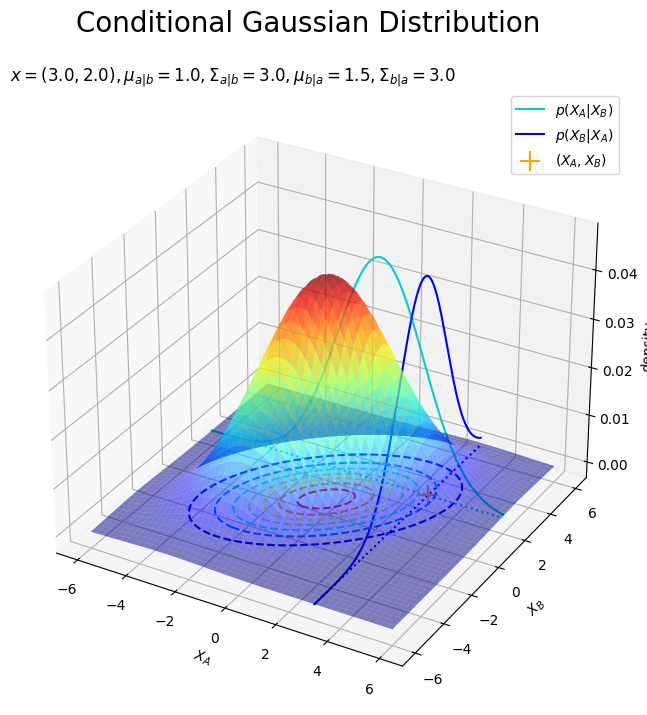

In [218]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(X_A, X_B, joint_dens.reshape(X_dim), cmap='jet', alpha=0.5) # 同時分布:(曲面図)
ax.contour(X_A, X_B, joint_dens.reshape(X_dim), cmap='jet', linestyles='--', offset=0) # 同時分布:(等高線図)
ax.plot(x_A, np.repeat(X_d[B], len(x_A)), 0.2*conditional_dens_A, color='darkturquoise', label='$p(X_A | X_B)$') # x1の条件付き分布
ax.plot(x_A, np.repeat(X_d[B], len(x_A)), np.repeat(0, len(X_A)), color='darkturquoise', linestyle=':') # x1の条件付き分布の補助線
ax.plot(np.repeat(X_d[A], len(x_B)), x_B, 0.2*conditional_dens_B, color='blue', label='$p(X_B | X_A)$') # x2の条件付き分布
ax.plot(np.repeat(X_d[A], len(x_B)), x_B, np.repeat(0, len(X_B)), color='blue', linestyle=':') # x2の条件付き分布の補助線
ax.scatter(X_d[A], X_d[B], color='orange', marker='+', s=200, label='$(X_A, X_B)$') # xの点
ax.set_xlabel('$X_A$')
ax.set_ylabel('$X_B$')
ax.set_zlabel('density')
ax.set_title('$x=(' + ', '.join([str(x) for x in np.round(X_d, 1)]) + ')' + 
             ', \mu_{a|b}=' + str(np.round(mean_A_B, 1)) + ', \Sigma_{a|b}=' + str(np.round(cov_A_B, 1)) + 
             ', \mu_{b|a}=' + str(np.round(mean_B_A, 1)) + ', \Sigma_{b|a}=' + str(np.round(cov_B_A, 1)) + '$', loc='left')
fig.suptitle('Conditional Gaussian Distribution', fontsize=20)
ax.legend()
#ax.view_init(elev=0, azim=300) # 表示アングル
plt.show()

In [220]:
marginal_dens_A = norm.pdf(x=x_A, loc=mean_d[A], scale=np.sqrt(cov_d[A][A]))
marginal_dens_B = norm.pdf(x=x_B, loc=mean_d[B], scale=np.sqrt(cov_d[B][B]))

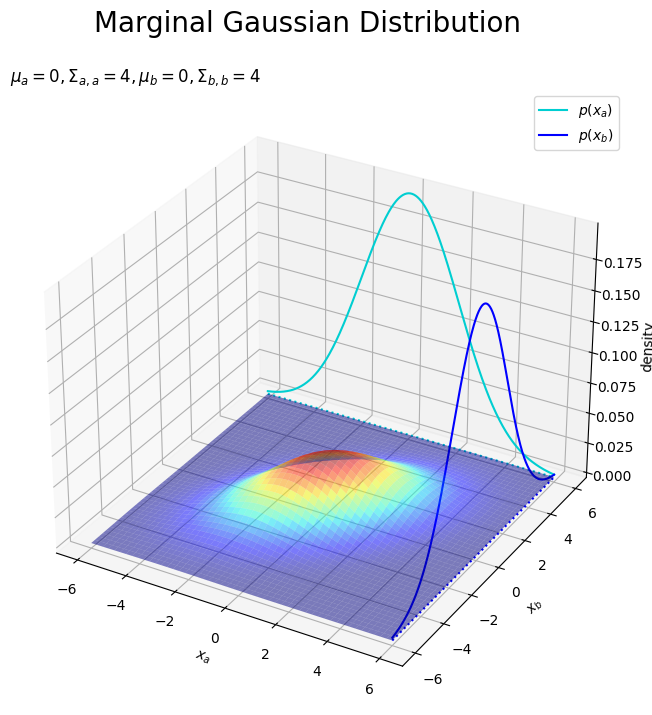

In [222]:
# 周辺ガウス分布の3Dグラフを作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(X_A, X_B, joint_dens.reshape(X_dim), cmap='jet', alpha=0.5) # 同時分布:(曲面図)
#ax.contour(X_a, X_b, joint_dens.reshape(x_dims), cmap='jet', linestyles='--', offset=0) # 同時分布:(等高線図)
ax.plot(x_A, np.repeat(np.max(x_B), len(x_A)), marginal_dens_A, color='darkturquoise', label='$p(x_a)$') # x1の周辺分布
ax.plot(x_A, np.repeat(np.max(x_B), len(x_A)), np.repeat(0, len(x_A)), color='darkturquoise', linestyle=':') # x1の周辺分布の補助線
ax.plot(np.repeat(np.max(x_A), len(x_B)), x_B, marginal_dens_B, color='blue', label='$p(x_b)$') # x2の周辺分布
ax.plot(np.repeat(np.max(x_A), len(x_B)), x_B, np.repeat(0, len(x_B)), color='blue', linestyle=':') # x2の周辺分布の補助線
ax.set_xlabel('$x_a$')
ax.set_ylabel('$x_b$')
ax.set_zlabel('density')
ax.set_title('$\mu_a=' + str(np.round(mean_d[A], 1)) + ', \Sigma_{a,a}=' + str(np.round(cov_d[A][A], 1)) + 
             ', \mu_b=' + str(np.round(mean_d[B], 1)) + ', \Sigma_{b,b}=' + str(np.round(cov_d[B][B], 1)) + '$', loc='left')
fig.suptitle('Marginal Gaussian Distribution', fontsize=20)
ax.legend()
#ax.view_init(elev=0, azim=270) # 表示アングル
plt.show()

### 2.3.3 ガウス変数に対するベイズの定理

### 2.3.4 ガウス分布の最尤推定

**まず前提としてこの節は最尤推定の節なので我々は真のガウス分布の平均や共分散は知らず、それらのパラメータをデータから推測する**

D次元ガウス分布からN個のベクトルが独立に得られたと仮定したデータ集合$\mathbf{X}$があるとき、その分布のパラメータは最尤推定法で推測できる。
対数尤度関数は
$$
\ln p(\mathbf{X}|\boldsymbol{\mu}, \boldsymbol{\Sigma}) = 
-\frac{ND}{2} \ln(2\pi) 
- \frac{N}{2} \ln|\boldsymbol{\Sigma}| 
-\frac{1}{2} \sum_{n=1}^N (\mathbf{x}_n - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}_n - \boldsymbol{\mu})
$$

平均についての最尤推定と共分散についての最尤推定は
$$
\boldsymbol{\mu}_{\text{ML}} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n \\
\boldsymbol{\Sigma}_{\text{ML}} = \frac{1}{N} \sum_{n=1}^N (\mathbf{x}_n - \boldsymbol{\mu}_{\text{ML}})(\mathbf{x}_n - \boldsymbol{\mu}_{\text{ML}})^T

$$

In [ ]:
from scipy.stats import multivariate_normal
import numpy as np

In [ ]:
# ガウス分布の次元と生成するデータ数を決める。
D = 4
N = 1000000 # <1000000

# 平均を設定
true_mean = np.zeros(D)

# 共分散行列（正定値行列）を設定
cov = np.random.rand(D, D)
# 任意の行列に対してA^{T}Aは正定値となる（コレスキー分解）
true_cov = cov.T @ cov

In [ ]:
# 真の平均、共分散を持つ多次元ガウス分布から独立にデータを生成
rv = multivariate_normal(true_mean, true_cov)
samples = rv.rvs(N)

In [ ]:
# 独立なデータのみから平均についての最尤推定値および共分散についての最尤推定値を計算
ML_mean = np.sum(samples, axis=0) / N
samples_mu = samples - ML_mean
sum_cov = np.zeros((D, D))
for i in range(N):
    sum_cov += np.kron(samples_mu[i], samples_mu[i]).reshape(D,D)
ML_cov = sum_cov / N

In [ ]:
# 真の平均と最尤推定値を比較（Nを大きくすると0に近づく）
print(ML_mean - true_mean)
# 真の共分散と最尤推定値を比較（Nを大きくすると0に近づく）
print(ML_cov - true_cov)

[0.00055952 0.00055468 0.00053551 0.00137105]
[[-0.00049798 -0.00018227 -0.00082893  0.00010173]
 [-0.00018227 -0.0002485  -0.00037696  0.00033466]
 [-0.00082893 -0.00037696 -0.00114474 -0.00035208]
 [ 0.00010173  0.00033466 -0.00035208  0.00101905]]


### 2.3.5 逐次推定

平均の最尤推定量$\boldsymbol{\mu}_{ML}^{(N)}$について

最後のデータ点$x_N$がどれくらい影響したかを調べると

$$
\boldsymbol{\mu}_{ML}^{(N)} = 
\boldsymbol{\mu}_{ML}^{(N-1)} + \frac{1}{N}(\mathbf{x}_N - \boldsymbol{\mu}_{ML}^{(N-1)})
$$

Nが増えるほど後続のデータ点からの影響はより小さくなる。
- **Robbins-Monroアルゴリズム**

Robbins-Monroアルゴリズムは、逐次推定（逐次近似）の一種で、非線形方程式の根や統計的な推定量を求めるために使用される反復法である。このアルゴリズムは、非線形の確率方程式に対する解を逐次的に推定するために用いられる。特に、期待値に関連する方程式の解を見つける際に便利。

**アルゴリズムの概要**

Robbins-Monroアルゴリズムは、以下の反復式に基づいている。

$$
\theta_{n+1} = \theta_n + \alpha_n \left( Y_n - g(\theta_n) \right)
$$

ここで、
- $ \theta_n $は$ n$回目の推定値。
- $ \alpha_n $は学習率で、一般に$ n$の逆数やその他の減衰関数として選ぶ。
- $ Y_n $はサンプルまたは観測値で、確率変数として扱われる。
- $ g(\theta) $は推定したい期待値または方程式の左辺。

アルゴリズムの目的は、方程式$ g(\theta) = 0 $の解を見つけること。



### 2.3.6 ガウス分布に対するベイズ推論

ここからはベイズ主義的な話

まず、1変数のガウス確率変数xの簡単な例\
##### 平均が未知で分散が既知の場合

尤度関数は
$$
p(\mathbf{x}|\mu) = \prod_{n=1}^{N}{p(x_n|\mu)} = \frac{1}{(2\pi\sigma^2)^{N/2}}\exp{\left\{ -\frac{1}{2\sigma^2}\sum_{n=1}^{N}{(x_n-\mu)^2}  \right\}}
$$

ガウス分布の**共役事前分布**はガウス分布であることが知られている。

事前分布を
$$
p(\mu) = N(\mu|\mu_0,\sigma_0^2)
$$

すると事後分布は
$$
p(\mu|\mathbf{x}) \propto \exp{\left\{ -\frac{1}{2\sigma^2}\sum_{n=1}^{N}{(x_n-\mu)^2}\right\}} × \exp{\left\{ -\frac{1}{2\sigma_0^2}{(\mu-\mu_0)^2}\right\}}
$$
となる。指数部分の中身を計算し、$\mu$の次数ごとに項を分けると

$$
-\frac{1}{2\sigma^2}\sum_{n=1}^{N}{(x_n-\mu)^2} -\frac{1}{2\sigma_0^2}{(\mu-\mu_0)^2}\\
 = -\frac{\mu^2}{2}\left( \frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}\right) +\mu\left( \frac{\mu_0}{\sigma_0^2}+\frac{1}{\sigma^2}\sum_{n}{x_n}\right) + const
$$

一般的なガウス分布の指数部分を展開すると
$$
-\frac{1}{2\sigma^2}(x^2 - 2x\mu + \mu^2)
$$
係数を比較すると、$-\frac{\mu^2}{2}$の係数が分散の逆数になっているので、
$$
\sigma_N^2 = \frac{\sigma_0^2\sigma^2}{N\sigma_0^2+\sigma^2}
$$

また平均は
$$
\mu_N = \frac{\sigma^2\mu_0+N\sigma_0^2\mu_{ML}}{N\sigma_0^2+\sigma^2}
$$
この式は観測データ点数がN=0なら事前分布の平均となる。一方、N→∞では事前分布の平均は最尤推定解となる。

また、分散はN=0なら事前分布の分散となる、一方、N→∞では分散は0に限りなく近づく。



In [99]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

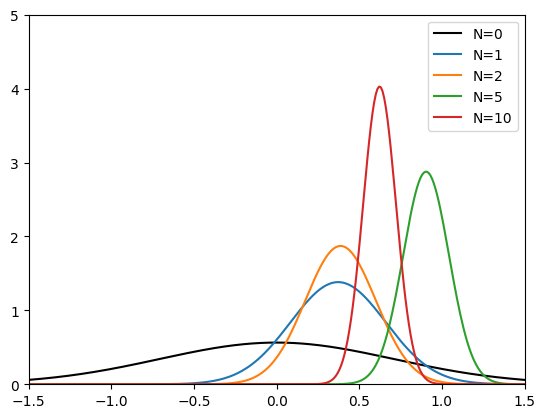

In [100]:
mean_prior = 0.0
std_prior = np.sqrt(0.5)

mean_likelihood = 0.8
std_likelihood = np.sqrt(0.1)

N = [1, 2, 5, 10]

x = np.linspace(-1.5, 1.5, 301)
# 事前分布の確率密度分布を生成
y_prior = norm.pdf(x=x, loc=mean_prior, scale=std_prior)
ax = plt.subplot()
ax.plot(x, y_prior, label="N=0", c="black")

for n in N:
    # 真の分布（尤度関数）からデータを得る
    y_generate = norm.rvs(loc=mean_likelihood, scale=std_likelihood, size=n)
    # 平均は最尤推定解を用いる
    mean_ML = y_generate.sum() / n

    # 尤度関数の分散はわかっている
    std_posterior = np.sqrt((std_prior**2 * std_likelihood**2)/(n * std_prior**2 + std_likelihood**2))
    # 尤度関数の平均は未知である
    mean_posterior = (std_likelihood**2*mean_prior + n*std_prior**2*mean_ML)/(n*std_prior**2+std_likelihood**2)

    # 事後分布の平均と分散を用いて確率密度分布を生成
    y_posterior = norm.pdf(x=x, loc=mean_posterior, scale=std_posterior)

    ax.plot(x, y_posterior, label=f"N={n}")
ax.set_ylim([0, 5])
ax.set_xlim([-1.5, 1.5])

plt.legend()


##### 平均が既知で分散が未知の場合

分散の逆数である**精度**$\lambda$を用いて計算した方が便利である。

尤度関数は
$$
p(\mathbf{x}|\lambda) = 
\prod_{n=1}^{N}{N(x_n|\mu, \lambda^{-1})}
\propto \lambda^{N/2}\exp{\left\{ -\frac{\lambda}{2}\sum_{n=1}^{N}(x_n-\mu)^2 \right\}}
$$

**共役事前分布**はガンマ分布が当てはまる。
$$
Gam(\lambda|a, b) = \frac{1}{\Gamma{(a)}}b^a\lambda^{a-1}\exp{(-b\lambda)}
$$

In [122]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

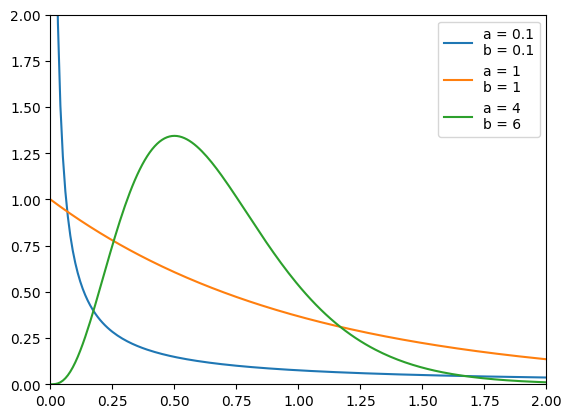

In [123]:
x = np.linspace(0, 2, 201)
a = [0.1, 1, 4]
b = [0.1, 1, 6]
for alpha, beta in zip(a, b):
    # Gamma分布
    y = gamma.pdf(x, a=alpha, scale=1/beta)
    plt.plot(x,y, label=f"a = {alpha}\nb = {beta}")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()

事後分布は
$$
p(\lambda|\mathbf{x}) 
\propto \lambda^{a_0 - 1} \lambda^{N/2} 
\exp{\left\{ -b_0\lambda -\frac{\lambda}{2}\sum_{n=1}^{N}(x_n-\mu)^2 \right\}}
$$
事後分布のガンマ分布のパラメータ$a_N$と$b_N$は
$$
a_N = a_0 + \frac{N}{2}\
b_N = b_0 + \frac{1}{2}\sum_{n=1}^{N}{(x_n - \mu)^2} = b_0 + \frac{N}{2}\sigma_{ML}^2
$$

In [124]:
from scipy.stats import gamma, norm
import numpy as np
import matplotlib.pyplot as plt

2.5204142630349518
3.5388249514094223
4.845308532296869
16.911435223889388
183.50062947685595


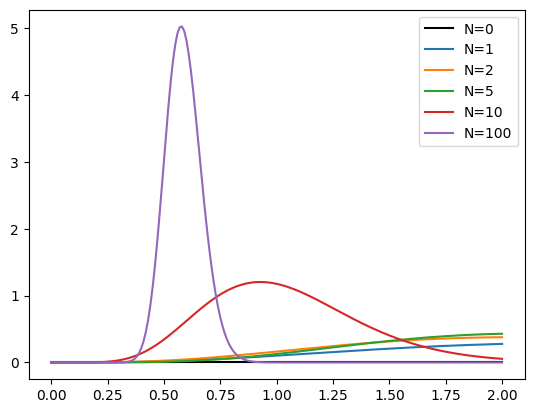

In [157]:
# あっている気がしない
mean_prior = 4
std_prior = np.sqrt(6)
b_prior = 1 / std_prior**2
a_prior = 4

mean_likelihood = 0
std_likelihood = np.sqrt(2)

N = [1, 2, 5, 10, 100]

x = np.linspace(0, 2, 201)
# 事前分布の確率密度分布を生成
y_prior = gamma.pdf(x=x, a=a_prior, loc=mean_prior, scale=1 / b_prior)
ax = plt.subplot()
ax.plot(x, y_prior, label="N=0", c="black")

for n in N:
    # 真の分布（尤度関数）からデータを得る
    y_generate = norm.rvs(loc=mean_likelihood, scale=std_likelihood, size=n)
    # 平均は最尤推定解を用いる
    var_ML = ((y_generate-mean_likelihood)**2).sum()
    print(var_ML)

    # 尤度関数の分散はわかっている
    a_posterior = a_prior + n / 2
    # 尤度関数の平均は未知である
    b_posterior = b_prior + 1 / 2 * var_ML

    # 事後分布の平均と分散を用いて確率密度分布を生成
    y_posterior = gamma.pdf(x=x, a=a_posterior, loc=mean_likelihood, scale=1 / b_posterior)

    ax.plot(x, y_posterior, label=f"N={n}") 
plt.legend()

### 2.3.7 スチューデントのt分布

スチューデントのt分布は**平均は同じだが分散が違うガウス分布を無限個足し合わせた分布**である。

特徴としてはパラメータに自由度があり、自由度が無限の時ガウス分布となる。自由度が1のときはコーシー分布と呼ばれる分布となる。

t分布はガウス分布に比べ、外れ値の影響が小さく頑健性が高い。

式は、
$$
St(x|\mu, \lambda, \nu) = 
\frac{\Gamma{(\frac{\nu+1}{2})}} {\Gamma{(\frac{\nu}{2})}}
\left(\frac{\lambda}{\pi\nu}\right)^{1/2}
\left[ 1 + \frac{\lambda(x - \mu)^2}{\nu} \right]^{-\frac{\mu+1}{2}}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma, digamma

In [2]:
class Gaussian(object):

    def fit(self, x):
        self.mean = np.mean(x)
        self.var = np.var(x)

    def predict_proba(self, x):
        return (np.exp(-0.5 * (x - self.mean) ** 2 / self.var)
                / np.sqrt(2 * np.pi * self.var))


class StudentsT(object):

    def __init__(self, mean=0, a=1, b=1, learning_rate=0.01):
        self.mean = mean
        self.a = a
        self.b = b
        self.learning_rate = learning_rate

    def fit(self, x):
        while True:
            params = [self.mean, self.a, self.b]
            self._expectation(x)
            self._maximization(x)
            if np.allclose(params, [self.mean, self.a, self.b]):
                break

    def _expectation(self, x):
        self.precisions = (self.a + 0.5) / (self.b + 0.5 * (x - self.mean) ** 2)

    def _maximization(self, x):
        self.mean = np.sum(self.precisions * x) / np.sum(self.precisions)
        a = self.a
        b = self.b
        self.a = a + self.learning_rate * (
            len(x) * np.log(b)
            + np.log(np.prod(self.precisions))
            - len(x) * digamma(a))
        self.b = a * len(x) / np.sum(self.precisions)

    def predict_proba(self, x):
        return ((1 + (x - self.mean) ** 2/(2 * self.b)) ** (-self.a - 0.5)
                * gamma(self.a + 0.5)
                / (gamma(self.a) * np.sqrt(2 * np.pi * self.b)))

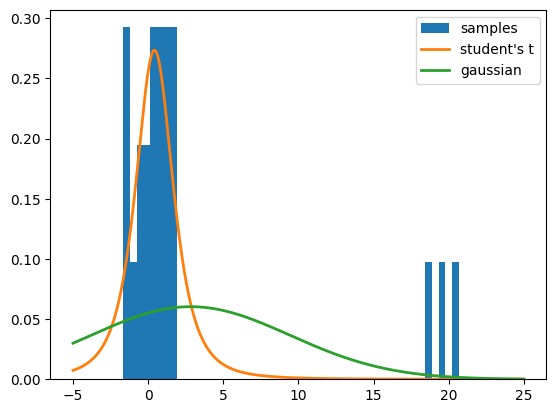

In [5]:
x = np.random.normal(size=20)
x = np.concatenate([x, np.random.normal(loc=20., size=3)])
plt.hist(x, bins=50, density=True, label="samples")

# prepare model
students_t = StudentsT()
gaussian = Gaussian()

# maximum likelihood estimate
students_t.fit(x)
gaussian.fit(x)

# plot results
x = np.linspace(-5, 25, 1000)
plt.plot(x, students_t.predict_proba(x), label="student's t", linewidth=2)
plt.plot(x, gaussian.predict_proba(x), label="gaussian", linewidth=2)
plt.legend()
plt.show()

### 2.3.8 周期変数

### 2.3.9 混合ガウス分布

$$
p(\mathbf{x}) = \sum_{k=1}^{K}{\pi_k N(\mathbf{x}|\boldsymbol{\mu_k}, \Sigma_k)}
$$

In [117]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [250]:
A , B, C = 0, 1, 2

mean = np.array([[2.5, 50], [4, 75], [3, 65]])
cov = np.array([[[0.1, 2], [1, 40]], [[0.1, 3], [1, 50]], [[0.1, -1], [-1, 30]]])

data_A = multivariate_normal.rvs(mean=mean[A], cov=cov[A], size=80)
data_B = multivariate_normal.rvs(mean=mean[B], cov=cov[B], size=200)
data_C = multivariate_normal.rvs(mean=mean[C], cov=cov[C], size=120)
data = np.vstack((data_A, data_B, data_C))

c:\Users\arata\OneDrive\ドキュメント\PRML\.venv\lib\site-packages\scipy\stats\_multivariate.py:758: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


(40.0, 100.0)

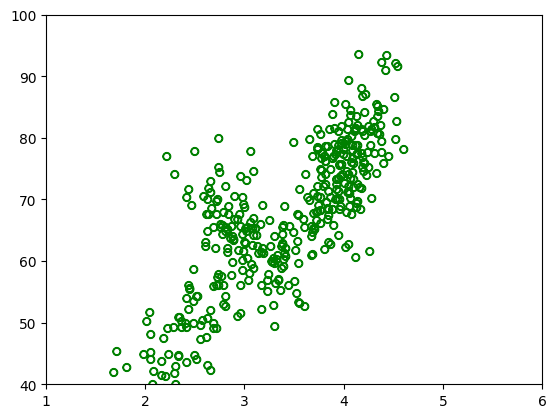

In [251]:
# ふたつのガウス分布に分けられそうな図
plt.scatter(data[:,0], data[:,1], marker='$○$', c='g')
plt.xlim([1, 6])
plt.ylim([40, 100])

In [252]:
mean_estimate = np.mean(data, axis=0)
cov_estimate = np.cov(data, rowvar=False)

x, y = np.mgrid[1:6:0.01, 40:100:0.1]
pos = np.dstack((x, y))

norm_dist = multivariate_normal(mean=mean_estimate, cov=cov_estimate)
norm_dist = norm_dist.pdf(pos)

(40.0, 100.0)

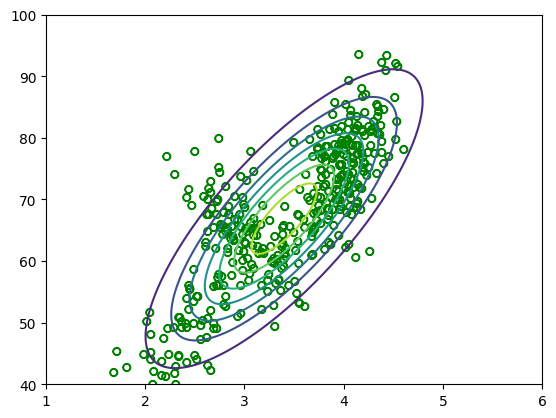

In [253]:
plt.scatter(data[:,0], data[:,1], marker='$○$', c='g')
plt.contour(x, y, norm_dist)
plt.xlim([1, 6])
plt.ylim([40, 100])

In [254]:
# クラスタリング
from sklearn.cluster import KMeans

In [255]:
n = 3
kmeans = KMeans(n_clusters=n)
kmeans.fit(data)

c:\Users\arata\OneDrive\ドキュメント\PRML\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [256]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

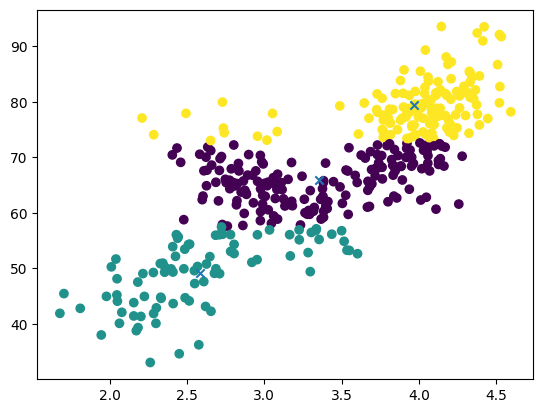

In [257]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x')
plt.show()

In [258]:
data_A = data[labels==0]
data_B = data[labels==1]
data_C = data[labels==2]

x, y = np.mgrid[1:6:0.01, 40:100:0.1]
pos = np.dstack((x, y))

mean_estimate_A = np.mean(data_A, axis=0)
cov_estimate_A = np.cov(data_A, rowvar=False)
norm_dist = multivariate_normal(mean=mean_estimate_A, cov=cov_estimate_A)
norm_dist_A = norm_dist.pdf(pos)

mean_estimate_B = np.mean(data_B, axis=0)
cov_estimate_B = np.cov(data_B, rowvar=False)
norm_dist = multivariate_normal(mean=mean_estimate_B, cov=cov_estimate_B)
norm_dist_B = norm_dist.pdf(pos)

mean_estimate_C = np.mean(data_C, axis=0)
cov_estimate_C = np.cov(data_C, rowvar=False)
norm_dist = multivariate_normal(mean=mean_estimate_C, cov=cov_estimate_C)
norm_dist_C = norm_dist.pdf(pos)

(40.0, 100.0)

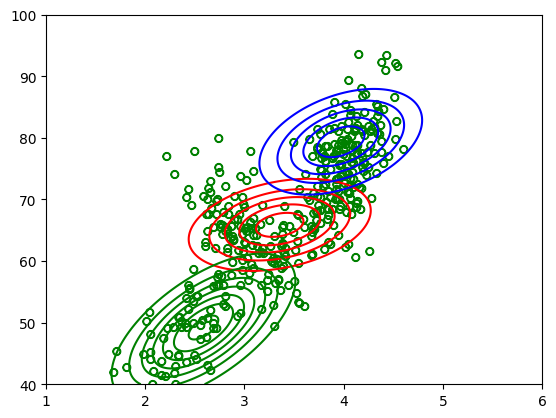

In [259]:
plt.scatter(data[:,0], data[:,1], marker='$○$', c='g')
plt.contour(x, y, norm_dist_A, colors='r')
plt.contour(x, y, norm_dist_B, colors='g')
plt.contour(x, y, norm_dist_C, colors='b')
plt.xlim([1, 6])
plt.ylim([40, 100])

In [260]:
# 混合ガウス分布でやってみる
from sklearn.mixture import GaussianMixture

In [261]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(n_components=3)

In [262]:
weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_

print(weights)
print(means)
print(covariances)

[0.50666368 0.30208596 0.19125036]
[[ 3.98791016 75.13485232]
 [ 3.0148122  64.29921554]
 [ 2.44617419 49.09424542]]
[[[ 0.06264655  1.06021875]
  [ 1.06021875 51.54590806]]

 [[ 0.0893906  -1.12700304]
  [-1.12700304 34.64267517]]

 [[ 0.10050731  1.32966071]
  [ 1.32966071 46.12049556]]]


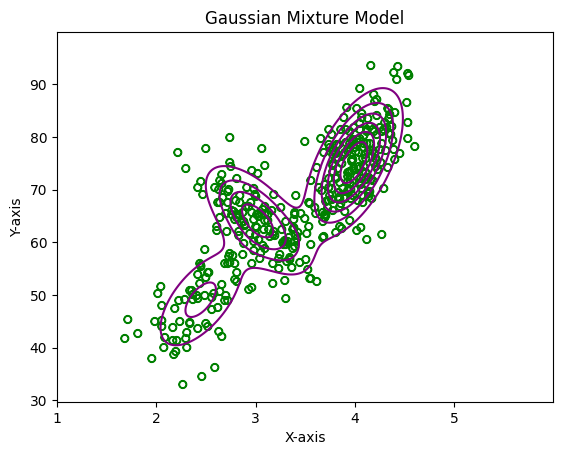

In [263]:
x, y = np.mgrid[1:6:0.01, 40:100:0.1]
pos = np.dstack((x, y))

z = np.zeros_like(x)
for i in range(3):
    rv = multivariate_normal(means[i], covariances[i])
    z += weights[i] * rv.pdf(pos)
    
plt.contour(x, y, z, colors='purple')
plt.scatter(data[:, 0], data[:, 1], c='g', marker="$○$")
plt.title('Gaussian Mixture Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()